In [26]:
using DataFrames, CSV, DelimitedFiles, Plots, FFTW
include("/home/kirk/Documents/research/CHANDRATest/DJM.jl")

Main.DJM

In [27]:
function genFreqSums(powMatrix)
    sums=zeros(length(powMatrix[1,1,2:end]))
    for i in 1:length(powMatrix[1,1,2:end])
        sums[i]+=sum(powMatrix[:,:,i+1]) #i+1 becaus normal matrix is in 1st slice
    end
    return sums
end
function sumsLog(sums)
    sums4log=zeros(length(sums))
    for i in 1:length(sums4log)
        if sums[i]==0
            sums4log[i]=1
        else
            sums4log[i]=sums[i]
        end
    end
    return sums4log
end
function genFRange(df,powList)
    fbins=ceil(maximum(powList.freq[:])/df)
    frange=zeros(Int(fbins))
    for i in 1:length(frange)
        frange[i]=i*df
    end
    return frange
end

genFRange (generic function with 1 method)

In [28]:
pows8=CSV.read("cxc.fftinfo.all8")
pows8MatrixOVERLAP,pows8src=DJM.createPowMatrix(pows8,1)

1255743 potential matches had the same obsid and were excluded.


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 6.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Any[[(65, 508)], [(65, 509)], [(65, 510)], [(66, 511)], [(66, 512)], [(70, 581)], [(70, 582)], [(70, 583)], [(123, 1335)], [(123, 1336)]  …  [(10994, 11056)], [(10994, 11057)], [(10994, 11058)], [(10994, 11059)], [(10994, 11060)], [(11000, 11065)], [(11005, 11066)], [(11006, 11066)], [(11010, 11077)], [(11108, 11122)]])

In [45]:
println(length(pows8src))

1157


In [30]:
MCList=CSV.read("MCTestList.csv")
noMissing=dropmissing(MCList,:pulse_period,disallowmissing=true)
noMissing=dropmissing(noMissing,:ra,disallowmissing=true)

,name,ra,dec,porb,fx_limit,fx,fx_max
,String,Float64,Float64⍰,Float64⍰,String⍰,Float64⍰,Float64⍰
1,H 0053-739,13.6508,-73.6764,missing,<,1.0,50.0
2,RX J0117.6-7330,19.4225,-73.5136,missing,missing,10.0,missing
3,2U 0115-737,19.2729,-73.4422,3.89,missing,0.5,57.0
4,AX J0057.4-7325,14.3617,-73.4172,missing,missing,0.01,0.11
5,RX J0049.7-7323,12.425,-73.3875,394.0,missing,0.001,2.0
6,RX J0052.1-7319,13.0579,-73.3203,missing,missing,0.024,4.7
7,XTE SMC46,12.75,-73.3,missing,~,0.36,missing
8,XTE J0111.2-7317,17.785,-73.2794,missing,missing,95.7,missing
9,RX J0050.7-7316,12.6862,-73.2681,1.416,missing,0.16,missing


In [31]:
x3RA=12.5792
x3DEC=-72.7058
x1RA=18.94
x1DEC=-73.706
x3Counter,x1Counter=0,0
#go feed this through entire ting to check single sources, not just pairs
for n=1:length(pows8src)
    ind1=first.(pows8src[n])[1]
    ind2=last.(pows8src[n])[1]
    avgRA=(pows8.ra[ind1]+pows8.ra[ind2])/2
    avgDEC=(pows8.dec[ind1]+pows8.dec[ind2])/2
    rdist3=DJM.gcdist(avgRA,avgDEC,x3RA,x3DEC) #gcdist between freq pair
    rdist1=DJM.gcdist(avgRA,avgDEC,x1RA,x1DEC)
    if rdist1*60 < 0.01666
        x1Counter+=1
    end
    if rdist3*60 < 0.01666
        x3Counter+=1
    end
end
println("potential paired matches for x3 = $x3Counter")
println("potential paired matches for x1 = $x1Counter")

potential paired matches for x3 = 0
potential paired matches for x1 = 0


In [32]:
justRA=pows8.ra[:]
justDec=pows8.dec[:]
x1Count,x3Count=0,0
for i=1:length(justRA)
    dist=DJM.gcdist(x3RA,x3DEC,justRA[i],justDec[i])
    if dist*60<0.01666
        x3Count+=1
    end
    dist=DJM.gcdist(x1RA,x1DEC,justRA[i],justDec[i])
    if dist*60<0.01666
        x1Count+=1
    end
end
println("$x3Count potential matches for x3 in entire dataset")
println("$x1Count potential matches for x1 in entire dataset")

2 potential matches for x3 in entire dataset
0 potential matches for x1 in entire dataset


In [33]:
justFreq8=pows8.freq[:]
knownFreq=noMissing.pulse_period[:].^-1
using Formatting  
function findFreqMatches(knownList,srcIndList,powList)
    freqList=powList.freq[:]
    knownFreq=knownList.pulse_period[:].^-1
    confirmedFreqInd=[] #keep track of places where frequencies potentially match to known pulsars
    unconfirmedFreqInd=[]
    anamalousFreqInd=[]
    for i in 1:length(srcIndList)
        print(format(i/length(srcIndList)*100,precision=2),"% complete\r") #output % tracker
        freq1Ind=first.(srcIndList[i])[1] #first element from tuple at index i, contains index where freq is
        freq2Ind=last.(srcIndList[i])[1] #1 needed because technically last.(A) returns [A] not just A
        freq1=freqList[freq1Ind]
        freq2=freqList[freq2Ind]
        avgRA=(powList.ra[freq1Ind]+powList.ra[freq2Ind])/2
        avgDEC=(powList.dec[freq1Ind]+powList.dec[freq2Ind])/2
        if freq1>freq2 && abs(freq1-freq2)<0.01 #check which one is bigger for range argument later
            freqMax=freq1
            freqMin=freq2
            for j=1:length(knownFreq)
                freq=knownFreq[j]
                knownRA=knownList.ra[j]
                knownDEC=knownList.dec[j]
                try
                    rdist=DJM.gcdist(avgRA,avgDEC,knownRA,knownDEC) #gcdist between freq pair
                    if rdist<0.1 #found a distance match
                        if freqMax>freq && freqMin<freq #found a frequency match
                            push!(confirmedFreqInd,[srcIndList[i],j]) 
                        end
                        #push the tuple of indices to confirmed list along with the index of freq in knownList
                    end
                catch
                    println("missing ra dec")
                end
            end
        elseif freq2>freq1 && abs(freq1-freq2)<0.01 #don't want range to be too big otherwise they're not the same thing
            freqMax=freq2
            freqMin=freq1
            for j=1:length(knownFreq)
                freq=knownFreq[j]
                knownRA=knownList.ra[j]
                knownDEC=knownList.dec[j]
                try
                    rdist=DJM.gcdist(avgRA,avgDEC,knownRA,knownDEC) #gcdist between freq pair
                    if rdist<0.1 #found a distance match
                        if freqMax>freq && freqMin<freq #found a frequency match
                            push!(confirmedFreqInd,[srcIndList[i],j]) 
                        end
                        #push the tuple of indices to confirmed list along with the index of freq in knownList
                    end
                catch
                    println("missing ra dec")
                end
            end
        end
        
    end
    
    return confirmedFreqInd,unconfirmedFreqInd
end
                
    

findFreqMatches (generic function with 1 method)

In [34]:
confirmedTest,unconfirmedTest=findFreqMatches(noMissing,pows8src,pows8)

(Any[Any[[(127, 1342)], 9], Any[[(127, 1344)], 15], Any[[(127, 1344)], 19], Any[[(327, 1251)], 11], Any[[(371, 1306)], 10], Any[[(381, 1283)], 9], Any[[(1372, 1412)], 38], Any[[(1372, 3044)], 38], Any[[(1372, 3044)], 43], Any[[(1372, 3045)], 38]  …  Any[[(9233, 9294)], 38], Any[[(9506, 10813)], 5], Any[[(9506, 10814)], 5], Any[[(9518, 10811)], 15], Any[[(9519, 10811)], 15], Any[[(9519, 10811)], 44], Any[[(9520, 10811)], 15], Any[[(9520, 10811)], 44], Any[[(9543, 10824)], 7], Any[[(9544, 10824)], 7]], Any[])

In [35]:
confirmedTest

53-element Array{Any,1}:
 Any[[(127, 1342)], 9]
 Any[[(127, 1344)], 15]
 Any[[(127, 1344)], 19]
 Any[[(327, 1251)], 11]
 Any[[(371, 1306)], 10]
 Any[[(381, 1283)], 9]
 Any[[(1372, 1412)], 38]
 Any[[(1372, 3044)], 38]
 Any[[(1372, 3044)], 43]
 Any[[(1372, 3045)], 38]
 Any[[(1372, 3045)], 43]
 Any[[(1372, 3046)], 38]
 Any[[(1372, 3046)], 43]
 ⋮
 Any[[(9079, 9156)], 38]
 Any[[(9079, 9157)], 38]
 Any[[(9233, 9294)], 38]
 Any[[(9506, 10813)], 5]
 Any[[(9506, 10814)], 5]
 Any[[(9518, 10811)], 15]
 Any[[(9519, 10811)], 15]
 Any[[(9519, 10811)], 44]
 Any[[(9520, 10811)], 15]
 Any[[(9520, 10811)], 44]
 Any[[(9543, 10824)], 7]
 Any[[(9544, 10824)], 7]

In [36]:
x1=confirmedTest[1][1][1][1]
x2=confirmedTest[1][1][1][2]
x3=confirmedTest[1][2]
x1Freq=pows8.freq[x1]
x2Freq=pows8.freq[x2]
x3Freq=noMissing.pulse_period[x3]^-1
println(x1Freq)
println(x2Freq)
println(x3Freq)
x1RA,x1DEC=pows8.ra[x1],pows8.dec[x1]
x2RA,x2DEC=pows8.ra[x1],pows8.dec[x2]
x3RA,x3DEC=noMissing.ra[x3],noMissing.dec[x3]
println(x1RA," ",x1DEC)
println(x2RA," ",x2DEC)
println(x3RA," ",x3DEC)
println(abs((x1Freq+x2Freq)/2-x3Freq))
rdist=DJM.gcdist((x1RA+x2RA)/2,(x1DEC+x2DEC)/2,x3RA,x3DEC)
println(rdist)
println((x1Freq+x2Freq)/2)

0.0032561126951107366
0.0030475526426494
0.0030959752321981426
12.685653586679686 -73.26817203995832
12.685653586679686 -73.26822008793319
12.68625 -73.26806
5.585743668192573e-5
0.00017170404797552322
0.0031518326688800683


### Results discussion:

above cell shows test of 1 result from match function--appears to be solid match but should check the rest to make sure they are also good.

In [37]:
pows8=CSV.read("cxc.fftinfo.all8")
pows8MatrixOVERLAP,pows8src=DJM.createPowMatrix(pows8,1)
sums8OVERLAP=genFreqSums(pows8MatrixOVERLAP)
sums8LogOVERLAP=sumsLog(sums8OVERLAP)

1255743 potential matches had the same obsid and were excluded.


1546-element Array{Float64,1}:
  8.0
  8.0
  5.0
  1.0
  6.0
 10.0
  1.0
  5.0
  3.0
  7.0
  9.0
  8.0
  6.0
  ⋮
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0

In [38]:
pows8Matrix=DJM.createPowMatrix(pows8,0)

1255743 potential matches had the same obsid and were excluded.


101×101×1547 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …      0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …      0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0      0.0      0.0       0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     10385.0  10772.0  10772.0  792899.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0      3901.0   4022.0   4022.0  296883.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   1569.0   1620.0   1620.0  119230.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0       660.0    688.0    688.0   50555.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0       386.0    400.0  

In [39]:
sums8=genFreqSums(pows8Matrix)
sums8Log=sumsLog(sums8)

1546-element Array{Float64,1}:
 2268.0
  789.0
  182.0
  287.0
  624.0
 1021.0
  134.0
  461.0
  211.0
  215.0
  127.0
   49.0
  196.0
    ⋮
    1.0
    1.0
    1.0
    2.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0

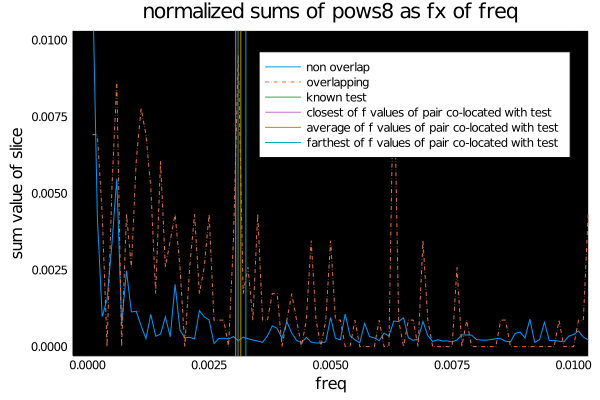

In [40]:
fRange8=genFRange(0.0001,pows8)
plot(fRange8,sums8./sum(sums8),title="normalized sums of pows8 as fx of freq",xlabel="freq",ylabel="sum value of slice",label="non overlap")
plot!(fRange8,sums8OVERLAP./sum(sums8OVERLAP),label="overlapping",linestyle=:dashdot,ylims=[0,0.01])
plot!(xlims=[0,0.01]) #this is for testing first result in checking_known_sources 
plot!([noMissing.pulse_period[x3]^-1],seriestype=:vline,label="known test")
plot!([x2Freq],seriestype=:vline,label="closest of f values of pair co-located with test")
plot!([(x1Freq+x2Freq)/2],seriestype=:vline,label="average of f values of pair co-located with test")
plot!([x1Freq],seriestype=:vline,label="farthest of f values of pair co-located with test")
plot!(background_color_inside=:black)

In [41]:
using Formatting
function genProbMatrix(powList)
    df=0.0001 #frequency binning
    nk=ceil(maximum(powList.freq[:])/df) #number of k indices
    justPow=powList.power[:]    
    probMatrix=zeros(Int(nk),Int(ceil(maximum(justPow)-minimum(justPow))+1)) #freq num x pow range, +1 because min-min=0
    counter=0
    for i=1:length(justPow) #THIS DOES NOT ACCOUNT FOR PAIRS IN SAME PLACE
        print(format(i/length(justPow)*100,precision=2),"% complete part 1\r") #output % tracker
        freqInd=Int(ceil(powList.freq[i]/df)) 
        powInd=Int(ceil(powList.power[i]-minimum(powList.power[:])))+1 #+1 because index starts at 1
        probMatrix[freqInd,powInd]+=1 #this overcounts because of pairing, but is rectified later
        counter+=1 #add one to total src count
    end
    
    #this accounts for pairs
    freqIndTrack=[] #set up to keep track of indices where we've already been
    powIndTrack=[]
    for i=1:length(justPow)
        print("\r")
        print(format(i/length(justPow)*100,precision=2),"% complete part 2\r") #output % tracker
        freq1Ind=Int(ceil(powList.freq[i]/df))
        pow1Ind=Int(ceil(powList.power[i]-minimum(powList.power[:])))+1 #+1 because min-min=0
        for j=i:(length(justPow)-1)#-1 because want i==j but still want pair not to be same src
            rdist=DJM.gcdist(powList.ra[j+1],powList.dec[j+1],powList.ra[i],powList.dec[i])
            if (60.0*rdist)<0.01666 #in the same place
                freq2Ind=Int(ceil(powList.freq[j+1]/df))
                pow2Ind=Int(ceil(powList.power[j+1]-minimum(powList.power[:])))+1 #+1 because min-min =0
                if j==i #so we only count i once
                    if freq1Ind in freqIndTrack && pow1Ind in powIndTrack && freq2Ind in freqIndTrack && pow2Ind in powIndTrack
                        continue #we've already accounted for this pair so no worries
                    else
                        probMatrix[freq1Ind,pow1Ind]-=1 #take away one because it's a loc pair
                        probMatrix[freq2Ind,pow2Ind]-=1 
                        counter-=2 #take 2 off counter
                        push!(freqIndTrack,freq1Ind) #add indices to our list 
                        push!(freqIndTrack,freq2Ind) #so that we don't oversubtract
                        push!(powIndTrack,pow1Ind)
                        push!(powIndTrack,pow2Ind)
                    end

                else
                    if freq2Ind in freqIndTrack && pow2Ind in powIndTrack
                        continue #already accounted for
                    else
                        probMatrix[freq2Ind,pow2Ind]-=1  #only need to take away from 2 because i already accounted for above
                        counter-=1
                        push!(freqIndTrack,freq2Ind) #add indices to list
                        push!(powIndTrack,pow2Ind)
                    end
                end
            end
        end
    end
    #this makes probabilities include greater than                            
    for i=1:length(probMatrix[:,1]) #num rows
        print("\r")
        print(format(i/length(probMatrix[:,1])*100,precision=2),"% complete part 3\r") #output % tracker
        currentRow=probMatrix[i,:]
        for j=1:length(currentRow) 
            probMatrix[i,j]+=sum(currentRow[(j+1):end]) #so each cell holds num >= to pow
        end
    end
    probMatrix=probMatrix./counter #rescales by dividing out total number of distinct sources
    return probMatrix
end

genProbMatrix (generic function with 1 method)

In [42]:
prob8=genProbMatrix(pows8)

98.83% complete part 288.41% complete part 288.46% complete part 288.51% complete part 288.55% complete part 288.58% complete part 288.64% complete part 288.73% complete part 288.90% complete part 288.94% complete part 288.97% complete part 289.03% complete part 289.15% complete part 289.51% complete part 289.92% complete part 289.97% complete part 289.99% complete part 290.04% complete part 290.09% complete part 290.15% complete part 290.18% complete part 290.24% complete part 290.25% complete part 2% complete part 290.27% complete part 290.34% complete part 290.36% complete part 290.38% complete part 290.40% complete part 290.50% complete part 290.52% complete part 290.54% complete part 290.59% complete part 290.64% complete part 290.70% complete part 290.75% complete part 290.80% complete part 290.84% complete part 290.88% complete part 290.93% complete part 290.96% complete part 291.02% complete part 291.07% complete part 291.12% complete part 291.18% complete part 291.23% complete

Excessive output truncated after 524291 bytes.

99.09

1546×1890 Array{Float64,2}:
 0.0618634    0.0618634    0.0573604    …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0257317    0.0257317    0.0230514       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0162968    0.0162968    0.0137236       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00857725   0.00857725   0.00578964      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00289482   0.00289482   0.00192988      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00192988   0.00192988   0.00096494   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00246596   0.00246596   0.00150102      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00257317   0.00257317   0.00128659      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00160823   0.00160823   0.00117937      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00278761   0.00278761   0.0020371       0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0195132    0.0195132    0.0161896    …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00418141   0.00418141   0.00310925      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.00117937   0.00117937   0.000428862     0.0  

In [43]:
function genSRCExp(srcList,probList,powList,numTrials,df=0.0001)
    SRCExp=[]
    minPow=minimum(powList.power[:])
    for i=1:length(srcList)
        pow1Ind=first.(srcList[i])[1]
        pow2Ind=last.(srcList[i])[1]
        pow1=ceil(powList.power[pow1Ind])
        pow2=ceil(powList.power[pow2Ind])
        pow1ProbInd=Int(ceil(pow1-minPow)+1) #-minimum because of how probList is made
        pow2ProbInd=Int(ceil(pow2-minPow)+1) #+1 because index starts at 1
        freq1Ind=Int(ceil(powList.freq[pow1Ind]/df))
        freq2Ind=Int(ceil(powList.freq[pow2Ind]/df))
        #NOTE: probList occasionally has zero entries where no data was available--what should probability be here?
        expected=numTrials*probList[freq1Ind,pow1ProbInd]*probList[freq2Ind,pow2ProbInd]
        push!(SRCExp,expected)
    end
    return SRCExp
end

genSRCExp (generic function with 2 methods)

In [48]:
pows8MatrixOVERLAP

101×101×1547 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  4.0  0.0  0.0  47.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  3.0  0.0  0.0  35.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  16.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  

In [49]:
numTrials8=1546*length(pows8src) #numfreq x numpairs
manip8=prob8
manip8=replace!(manip8,0=>1e3)
minNonZero=minimum(manip8) 
prob8NonZero=replace!(prob8,0=>minNonZero)#can't be zero chance even if we don't have data, so set zeros to min
test=genSRCExp(pows8src,prob8NonZero,pows8,numTrials8) #testing generation of number of expected sources from our list of potential pairs

1157-element Array{Any,1}:
      0.3289871065267845
      0.24674032989508835
      0.2056169415792403
      0.22617863573716432
      0.1439318591054682
      0.04112338831584806
      0.16449355326339224
      0.04112338831584806
      0.4934806597901767
      0.12337016494754417
      0.5140423539481007
 958894.6070547871
      0.6168508247377209
      ⋮
      0.16449355326339224
      0.24674032989508835
      0.061685082473772086
      0.1439318591054682
      0.02056169415792403
      0.04112338831584806
      0.12337016494754417
      0.3289871065267845
      0.16449355326339224
      0.8224677663169612
      0.18505524742131627
      1.5342313712876593e6

In [52]:
plot(test)
floatTest=Float64.(test)

1157-element Array{Float64,1}:
      0.3289871065267845
      0.24674032989508835
      0.2056169415792403
      0.22617863573716432
      0.1439318591054682
      0.04112338831584806
      0.16449355326339224
      0.04112338831584806
      0.4934806597901767
      0.12337016494754417
      0.5140423539481007
 958894.6070547871
      0.6168508247377209
      ⋮
      0.16449355326339224
      0.24674032989508835
      0.061685082473772086
      0.1439318591054682
      0.02056169415792403
      0.04112338831584806
      0.12337016494754417
      0.3289871065267845
      0.16449355326339224
      0.8224677663169612
      0.18505524742131627
      1.5342313712876593e6

In [59]:
threshold=maximum(floatTest) # this will take all of them #if 0.1 89 accepted
acceptList=[]
for i=1:length(floatTest)
    num=floatTest[i]
    if num<=threshold
        push!(acceptList,[num,i])
    end
end

In [60]:
acceptList #discarding away pairs where expected number was too high

1157-element Array{Any,1}:
 [0.3289871065267845, 1.0]
 [0.24674032989508835, 2.0]
 [0.2056169415792403, 3.0]
 [0.22617863573716432, 4.0]
 [0.1439318591054682, 5.0]
 [0.04112338831584806, 6.0]
 [0.16449355326339224, 7.0]
 [0.04112338831584806, 8.0]
 [0.4934806597901767, 9.0]
 [0.12337016494754417, 10.0]
 [0.5140423539481007, 11.0]
 [958894.6070547871, 12.0]
 [0.6168508247377209, 13.0]
 ⋮
 [0.16449355326339224, 1146.0]
 [0.24674032989508835, 1147.0]
 [0.061685082473772086, 1148.0]
 [0.1439318591054682, 1149.0]
 [0.02056169415792403, 1150.0]
 [0.04112338831584806, 1151.0]
 [0.12337016494754417, 1152.0]
 [0.3289871065267845, 1153.0]
 [0.16449355326339224, 1154.0]
 [0.8224677663169612, 1155.0]
 [0.18505524742131627, 1156.0]
 [1.5342313712876593e6, 1157.0]

In [61]:
srcInd=Int(acceptList[1][2])
pow1Ind=pows8src[srcInd][1][1]
pow2Ind=pows8src[srcInd][1][2]

508

# making folded LCs out of accepted list

In [62]:
acceptList

1157-element Array{Any,1}:
 [0.3289871065267845, 1.0]
 [0.24674032989508835, 2.0]
 [0.2056169415792403, 3.0]
 [0.22617863573716432, 4.0]
 [0.1439318591054682, 5.0]
 [0.04112338831584806, 6.0]
 [0.16449355326339224, 7.0]
 [0.04112338831584806, 8.0]
 [0.4934806597901767, 9.0]
 [0.12337016494754417, 10.0]
 [0.5140423539481007, 11.0]
 [958894.6070547871, 12.0]
 [0.6168508247377209, 13.0]
 ⋮
 [0.16449355326339224, 1146.0]
 [0.24674032989508835, 1147.0]
 [0.061685082473772086, 1148.0]
 [0.1439318591054682, 1149.0]
 [0.02056169415792403, 1150.0]
 [0.04112338831584806, 1151.0]
 [0.12337016494754417, 1152.0]
 [0.3289871065267845, 1153.0]
 [0.16449355326339224, 1154.0]
 [0.8224677663169612, 1155.0]
 [0.18505524742131627, 1156.0]
 [1.5342313712876593e6, 1157.0]

In [63]:
#set up file with obsid and srcnum of info from acceptList for use later
fileInfo=zeros(length(acceptList)*2,5) #times two because each is pair
counter=1
i=1
while i<2*length(acceptList)
    srcListPlace=Int(acceptList[counter][2])
    powListPlace1=Int(pows8src[srcListPlace][1][1])
    powListPlace2=Int(pows8src[srcListPlace][1][2])
    fileInfo[i,1]=pows8.obsid[powListPlace1]
    fileInfo[i,2]=pows8.srcnum[powListPlace1]
    fileInfo[i,3]=((pows8.freq[powListPlace1])^(-1)) #invert freq for T
    fileInfo[i+1,1]=pows8.obsid[powListPlace2]
    fileInfo[i+1,2]=pows8.srcnum[powListPlace2]
    fileInfo[i+1,3]=((pows8.srcnum[powListPlace2])^(-1)) #invert freq for T
    fileInfo[i,4]=acceptList[counter][1] #expected number at this pairing
    fileInfo[i+1,4]=acceptList[counter][1]
    fileInfo[i,5]=pows8.power[powListPlace1] #power of src 1
    fileInfo[i+1,5]=pows8.power[powListPlace2] #power of src 2
    i+=2
    counter+=1
end

In [64]:
pows8src[1][1][1]

65

In [65]:
x=Int(acceptList[1][2])
fileInfo[1,2]

6.0

In [66]:
fileInfo

2314×5 Array{Float64,2}:
 10985.0   6.0   8.15986    0.328987    8.70444
 12130.0  10.0   0.1        0.328987    8.51663
 10985.0   6.0   8.15986    0.24674     8.70444
 12130.0  10.0   0.1        0.24674     8.04331
 10985.0   6.0   8.15986    0.205617    8.70444
 12130.0  10.0   0.1        0.205617    8.76494
 10985.0   7.0  26.6769     0.226179   10.9093
 12130.0  11.0   0.0909091  0.226179    8.81618
 10985.0   7.0  26.6769     0.143932   10.9093
 12130.0  11.0   0.0909091  0.143932    8.69631
 10986.0  13.0   8.09796    0.0411234   8.43499
 12136.0  10.0   0.1        0.0411234   9.13216
 10986.0  13.0   8.09796    0.164494    8.43499
     ⋮                                 
   953.0  33.0  16.3507     0.12337     9.02124
   955.0  32.0   0.03125    0.12337     8.90837
   953.0  37.0  17.3503     0.328987    9.01643
   955.0  38.0   0.0263158  0.328987    8.77803
   953.0  41.0  48.8587     0.164494    9.22766
   955.0  41.0   0.0243902  0.164494    8.46435
   953.0  41.0  12.4928  

In [67]:
pows8src[250]
pows8.obsid[11010]

953

In [68]:
using DelimitedFiles

In [69]:
fileInfo4Copy=Int.(fileInfo[:,1:2])

2314×2 Array{Int64,2}:
 10985   6
 12130  10
 10985   6
 12130  10
 10985   6
 12130  10
 10985   7
 12130  11
 10985   7
 12130  11
 10986  13
 12136  10
 10986  13
     ⋮  
   953  33
   955  32
   953  37
   955  38
   953  41
   955  41
   953  41
   955  41
   953  49
   955  47
  9694  13
  9696  19

In [70]:
writedlm("obsid_src_test.txt",fileInfo,", ") #write results to file for use later in making LC
writedlm("obsid_src_test4COPY.txt",fileInfo4Copy,", ") #write integers to file for scp commands

In [31]:
pows8

,obsid,srcnum,startdate,exptime,ra,dec,freq,power
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1026,26,51833.8,6458.48,19.9382,-73.4501,0.00123975,13.2664
2,1026,8,51833.8,6458.48,19.5522,-73.6193,0.154427,9.16655
3,1027,107,51855.0,6133.27,18.8667,-73.3961,0.0185454,9.14431
4,1027,107,51855.0,6133.27,18.8667,-73.3961,0.144096,8.02378
5,1027,36,51855.0,6133.27,19.782,-73.5006,0.0813522,8.00401
6,1027,40,51855.0,6133.27,19.7033,-73.4917,0.0417401,8.04439
7,1027,54,51855.0,6133.27,19.5056,-73.4696,0.14484,8.14304
8,1027,58,51855.0,6133.27,19.4489,-73.4632,0.0598763,8.05626
9,1027,91,51855.0,6133.27,19.0827,-73.4213,0.0622972,8.75528


In [71]:
srcs=CSV.read("obsid_src_test.txt",header=false)

,Column1,Column2,Column3,Column4,Column5
,Float64,Float64,Float64,Float64,Float64
1,10985.0,6.0,8.15986,0.328987,8.70444
2,12130.0,10.0,0.1,0.328987,8.51663
3,10985.0,6.0,8.15986,0.24674,8.70444
4,12130.0,10.0,0.1,0.24674,8.04331
5,10985.0,6.0,8.15986,0.205617,8.70444
6,12130.0,10.0,0.1,0.205617,8.76494
7,10985.0,7.0,26.6769,0.226179,10.9093
8,12130.0,11.0,0.0909091,0.226179,8.81618
9,10985.0,7.0,26.6769,0.143932,10.9093


In [72]:
srcs.Column3[:]

2314-element Array{Float64,1}:
  8.159857485620378
  0.1
  8.159857485620378
  0.1
  8.159857485620378
  0.1
 26.676929782608696
  0.09090909090909091
 26.676929782608696
  0.09090909090909091
  8.097963319027182
  0.1
  8.097963319027182
  ⋮
 16.35069560371517
  0.03125
 17.350343904034897
  0.02631578947368421
 48.858678
  0.024390243902439025
 12.492830171793846
  0.024390243902439025
 47.527118192771084
  0.02127659574468085
 33.13721129568106
  0.05263157894736842

In [34]:
ceil(0.1)

1.0

In [65]:
using Printf
x=5.48238
println("hello: $(@sprintf("%.1f",x))")

hello: 5.5


MethodError: MethodError: First argument to `convert` must be a Type, got 88.8

In [15]:
asin(0.5)*180/pi

30.000000000000004

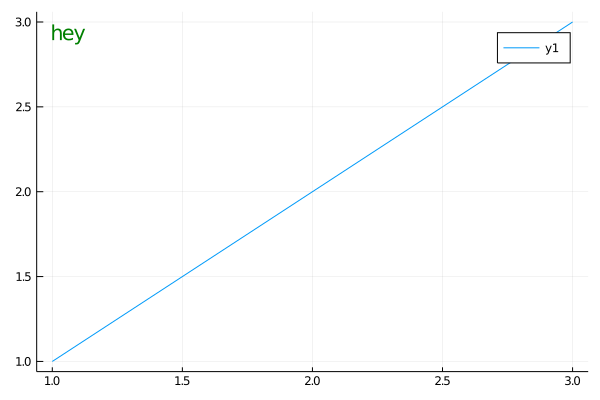

In [80]:
p=plot([1,2,3],[1,2,3])
annotate!([(1,3,text("hey", 14, :left, :top, :green))])